In [305]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 2

@author: yaning
"""

import importlib
import numpy as np
import matplotlib.pyplot as plt
import pickle

# my own class files
import with_learning.learning_NN.Receptors as Receptors
import with_learning.learning_NN.Network as Network


importlib.reload(Receptors)
importlib.reload(Network)

path = "/home/yaning/Documents/Spiking_NN/with_learning/"

In [306]:
# # try use MCMC result params
# path = "/home/yaning/Documents/Spiking_NN/with_learning/"
# samples = np.load(path + "MCMC_samples/samples_local.npy")
# cut_samples = samples[:, :]
# values = np.mean(cut_samples, axis=0)
# infer_names = Receptors.LigandGatedChannelFactory.infer_names
# infer_params = dict(zip(infer_names, values))
pointCount = 6500
deltaTms = 0.05
times = np.arange(pointCount) * deltaTms
initial_Vm = 1.3458754117369027

In [307]:
# instead of using control i write those two functions :(have to copy it everytime i run)
all_synapses = []

def create_synapse(send_neuron, receive_neuron, type):
    
    # create receptors accordingly
    if type == "AMPA":
        # temporal solution for weight randomise
        # Receptors.LigandGatedChannelFactory.set_params()
        ampa_receptor = Receptors.AMPA(0.0072, 1, -70, 1.35, 0.9, 1, 1, 1, 12, 10, 20, 10, 35, 7, 0.7, "AMPA")
        synapse = Network.Synapse(0.05, 0, send_neuron, receive_neuron, ampa_receptor)
        
    elif type == "AMPA+NMDA":
        # Receptors.LigandGatedChannelFactory.set_params()
        ampa_receptor = Receptors.AMPA(0.00072, 1, -70, 1.35, 0.9, 1, 1, 1, 12, 10, 20, 10, 35, 7, 0.7, "AMPA")
        nmda_receptor = Receptors.NMDA(0.0012, 1, -70, 1.35, 0.9, 1, 1, 1, 12, 10, 20, 10, 15, 7, 0.7, "NMDA")
        synapse = Network.Synapse(0.05, 0, send_neuron, receive_neuron, ampa_receptor, nmda_receptor)
    
    elif type == "GABA":
        # Receptors.LigandGatedChannelFactory.set_params()
        # print(Receptors.LigandGatedChannelFactory.w_init_GABA)
        gaba_receptor = Receptors.GABA(0.004, 1, -140, 1.35, 0.9, 1, 1, 1, 12, 10, 20, 10, 20, 7, 0.7, "GABA")
        synapse = Network.Synapse(0.05, 0, send_neuron, receive_neuron, gaba_receptor)

    send_neuron.outgoing_synapses.append(synapse)
    receive_neuron.incoming_synapses.append(synapse)

    all_synapses.append(synapse)

def update_synapse_initial_values(infer_params):
    for synapse in all_synapses:
        for receptor in synapse.receptors:
            receptor.Vm = initial_Vm
            receptor.gP = 1
            
            receptor.e = infer_params["e"]
            receptor.u_se = infer_params["u_se"]
            receptor.g_decay = infer_params["g_decay"]
            receptor.g_rise = infer_params["g_rise"]
            receptor.w = infer_params["w"]
            receptor.tau_rec = infer_params["tau_rec"]
            receptor.tau_pre = infer_params["tau_pre"]
            receptor.tau_post = infer_params["tau_post"]

            if receptor.label == "GABA":
                receptor.gMax = infer_params["gMax_GABA"]
                receptor.tau_decay = infer_params["tau_decay_GABA"]
                receptor.tau_rise = infer_params["tau_rise_GABA"]
            
            elif receptor.label == "NMDA":
                receptor.tau_decay = infer_params["tau_decay_NMDA"]
                receptor.tau_rise = infer_params["tau_rise_NMDA"]
            
            elif receptor.label == "AMPA":
                receptor.tau_decay = infer_params["tau_decay_AMPA"]
                receptor.tau_rise = infer_params["tau_rise_AMPA"]

In [308]:
with open(path + "infer_params_names.pkl", "rb") as f:
    infer_params, infer_names = pickle.load(f)

In [309]:
# Neuron: deltaTms, I, Vm, Name
neuron_input_0 = Network.Neuron(deltaTms, 0, initial_Vm, "input_0")
neuron_input_1 = Network.Neuron(deltaTms, 0, initial_Vm, "input_1")
neuron_input_2 = Network.Neuron(deltaTms, 0, initial_Vm, "input_2")

neuron_excite_main_0 = Network.Neuron(deltaTms, 0, initial_Vm, "excite_main_0")
neuron_excite_main_1 = Network.Neuron(deltaTms, 0, initial_Vm, "excite_main_1")


# neuron_excite_sub = Network.Neuron(deltaTms, 0, initial_Vm, "excite_sub")

neuron_inhibit_main = Network.Neuron(deltaTms, 0, initial_Vm, "inhibit_main")
neuron_inhibit_sub = Network.Neuron(deltaTms, 0, initial_Vm, "inhibit_sub")

# neuron_inhibit_sub = Network.Neuron(deltaTms, 0, initial_Vm, "inhibit_sub")

neuron_output = Network.Neuron(deltaTms, 0, initial_Vm, "output")

neurons = [neuron_input_0, neuron_input_1, neuron_input_2, neuron_excite_main_0, 
           neuron_excite_main_1, neuron_inhibit_main, neuron_inhibit_sub, neuron_output]

neuron_names = ["input_0", "input_1", "input_2",
                "excite_main_0", "excite_main_1", "inhibit_main", "inhibit_sub", "output"]





#*********************full layer***************************
# ----------------first input layer------------------------
create_synapse(neuron_input_0, neuron_excite_main_0, "AMPA")
create_synapse(neuron_input_1, neuron_excite_main_0, "AMPA")
create_synapse(neuron_input_2, neuron_excite_main_0, "AMPA")

create_synapse(neuron_input_0, neuron_excite_main_1, "AMPA")
create_synapse(neuron_input_1, neuron_excite_main_1, "AMPA")
create_synapse(neuron_input_2, neuron_excite_main_1, "AMPA")

# create_synapse(neuron_input_0, neuron_inhibit_main, "GABA")
# create_synapse(neuron_input_1, neuron_inhibit_main, "GABA")
# create_synapse(neuron_input_2, neuron_inhibit_main, "GABA")

create_synapse(neuron_input_0, neuron_inhibit_main, "GABA")
create_synapse(neuron_input_1, neuron_inhibit_main, "GABA")
create_synapse(neuron_input_1, neuron_inhibit_main, "GABA")

create_synapse(neuron_inhibit_main, neuron_inhibit_sub, "GABA")
create_synapse(neuron_inhibit_sub, neuron_inhibit_main, "GABA")

create_synapse(neuron_inhibit_main, neuron_excite_main_0, "GABA")
create_synapse(neuron_inhibit_main, neuron_excite_main_1, "GABA")

# # ----------------self recurrent layer----------------
# create_synapse(neuron_excite_main, neuron_excite_sub, "AMPA+NMDA")
# create_synapse(neuron_excite_sub, neuron_excite_main, "AMPA+NMDA")

# create_synapse(neuron_inhibit_main, neuron_inhibit_sub, "GABA")
# create_synapse(neuron_inhibit_sub, neuron_inhibit_main, "GABA")

# # --------------between excitatory and inhibitory----------------
# create_synapse(neuron_excite_main, neuron_inhibit_main, "AMPA+NMDA")
# create_synapse(neuron_inhibit_main, neuron_excite_main, "GABA")


# ----------------output layer----------------------
create_synapse(neuron_excite_main_0, neuron_output, "AMPA")
create_synapse(neuron_excite_main_1, neuron_output, "AMPA")


# recording arrays
Vm_neuron_output = []
neuron_output_currents = []
neuron_excite_main_firing_tstep = []
all_currents = []
all_voltages = []
GABA_gPs = []


In [310]:
# get the input neuron firing patterns
path = "/home/yaning/Documents/Spiking_NN/with_learning/"
input_pattern = np.load(path + "dataset.npy") 
output_pattern = np.load(path + "output.npy")

In [311]:
input_pattern.shape

(10, 3, 6500)

In [312]:
input_pattern = input_pattern[1]

In [313]:
# run
for t in range(pointCount):
    if input_pattern[0,t]:
        neuron_input_0.sending_signal()
        neuron_input_0.fire_tstep.append(t)
        
    if input_pattern[1,t]:
        neuron_input_1.sending_signal()
        neuron_input_1.fire_tstep.append(t)
        
    if input_pattern[2,t]:
        neuron_input_2.sending_signal()
        neuron_input_2.fire_tstep.append(t)


    # update the synapse states then each neuron
    num_cycle = 0
    for neuron in neurons[3:]:
        neuron.check_firing(t)
        neuron.update()
        # if num_cycle == 4:
        all_currents.append(neuron.I)
        all_voltages.append(neuron.Vm)
        num_cycle += 1
        
    # set the synapse states back to 0
    for synapse in all_synapses:
        synapse.state = 0


    # Vm_neuron_output.append(neuron_excite_main_0.Vm - 70)
    # neuron_output_currents.append(neuron_output.I)
    # neuron_excite_main_0_currents.append(neuron_excite_main_0.I)
    # neuron_excite_main_firing_tstep.append(neuron_excite_main.fire_tstep)

/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Receptors.py:79: RuntimeWarning: overflow encountered in exp
  self.m.alpha = .1*((25-self.Vm) / (np.exp((25-self.Vm)/10)-1))
/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Receptors.py:80: RuntimeWarning: overflow encountered in exp
  self.m.beta = 4*np.exp(-self.Vm/18)
/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Receptors.py:81: RuntimeWarning: overflow encountered in exp
  self.n.alpha = .01 * ((10-self.Vm) / (np.exp((10-self.Vm)/10)-1))
/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Receptors.py:82: RuntimeWarning: overflow encountered in exp
  self.n.beta = .125*np.exp(-self.Vm/80)
/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Receptors.py:83: RuntimeWarning: overflow encountered in exp
  self.h.alpha = .07*np.exp(-self.Vm/20)
/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Receptors.py:84: RuntimeWarning: overflow encountered in exp
  self.h.beta = 1/(np

In [314]:
max(all_currents)

729145783.2715565

In [315]:
len(neuron_output.fire_tstep)

83

In [316]:
# convert the firing array to a True and False array for the animation
firing_array = []
for i in neurons:
    converted = [t in i.fire_tstep for t in range(pointCount)]
    firing_array.append(converted)

firing_array = np.array(firing_array)


np.save(path + 'firing.npy', firing_array)

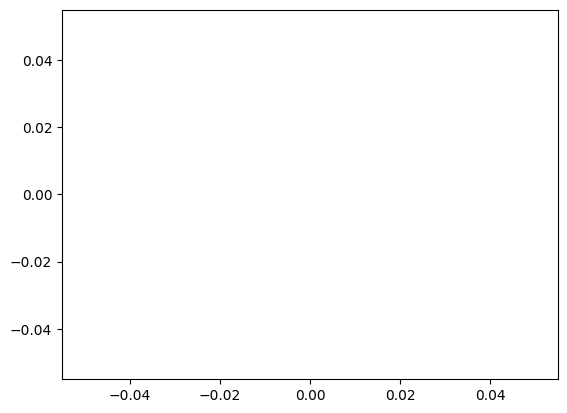

In [317]:
# plt.plot(times, leak_currents, label="leaky")
# plt.plot(times/deltaTms, Ina_currents)
# plt.plot(times/deltaTms, Ik_currents)
# plt.plot(times/deltaTms, Vm_neuron1)
# plt.plot(GABA_gPs)
# plt.plot(Vm_neuron_output)
# plt.plot(neuron_excite_main_0_currents, label="excite_main")
plt.plot(neuron_output_currents, label="output")
# plt.plot(neuron_input_1.fire_tstep)
# plt.plot(times/deltaTms, ampa_currents, label = "ampa")


# plt.xlim(1900, 3250)
# plt.ylim(-10, 20)
# plt.legend()

NameError: name 'Vm_neuron1' is not defined

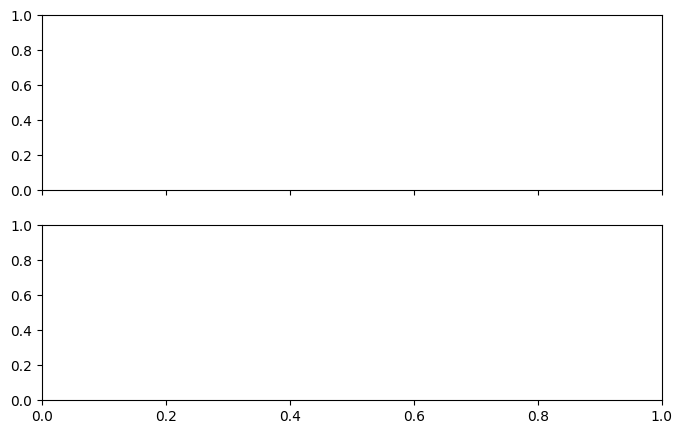

In [318]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5),
                                gridspec_kw={'height_ratios': [1, 1]})

ax1.plot(times, Vm_neuron1, label = '1')
ax1.plot(times, Vm_neuron2, label = '2')
ax1.set_ylabel("Membrane Potential (mV)")
# ax1.set_title("Hodgkin-Huxley Spiking Neuron Model", fontSize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)

# ax1.set_ylim(0, 1)


ax2.plot(times, I_neuron1, label = '1')
ax2.plot(times, I_neuron2, label = '2')
ax2.set_ylabel("Currents (µA/cm²)")
ax2.set_xlabel("Simulation Time (milliseconds)")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# ax2.set_ylim(-1,1)
# plt.xlim(98, 120)
plt.margins(0, 0.1)
plt.tight_layout()
plt.legend()
plt.show()

# sharp wave ripples